## Profit Prediction 

Using the expenditure of the company we will be predicting the profit of the company 

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [9]:
company = pd.read_csv("/Users/maneth/Desktop/1000_companies.csv")

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [10]:
company.head

<bound method NDFrame.head of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

In [11]:
company.tail

<bound method NDFrame.tail of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

In [12]:
company.describe

<bound method NDFrame.describe of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

### Check data types of each column

In [13]:

data_types = company.dtypes
print("Data Types:")
print(data_types)


Data Types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


## Checking for Missing Values 

In [14]:
company.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Checking for duplicates 

In [15]:
company.duplicated().sum()

1

In [16]:
company[company.duplicated(subset=['R&D Spend'])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8000,45173.0600,California,14681.4000
755,84533.0,122941.3141,231885.6935,California,121248.7116
862,153606.0,133142.3294,365162.2357,New York,180257.1795


In [17]:
company

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


After clear inspection though they say duplicates could be found, it would be a problem beacuse the data still provides a meaningful interpretation if in case we want to get rid of subsets we can use the command: 

- company.drop_duplicates(subset=['R&D Spend'])
- company.duplicated().sum() -> Summation of all duplicates 
- company.drop_duplicates() -> To drop any duplicates

## Identifying categorical and numerical features

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in company.columns if company[feature].dtype != 'O']
categorical_features = [feature for feature in company.columns if company[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

We have 1 categorical features : ['State']


### Corelation between data

In [19]:
company['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

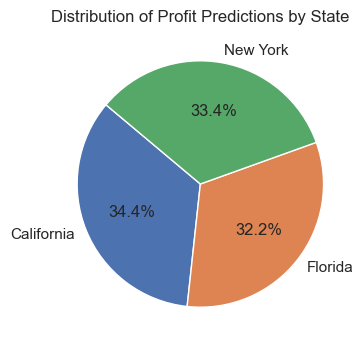

In [20]:
# Group by 'States' and count the number of profit predictions for each state
state_profit_counts = company.groupby('State')['Profit'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(state_profit_counts, labels=state_profit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profit Predictions by State')
plt.show()

### Univariate Analysis


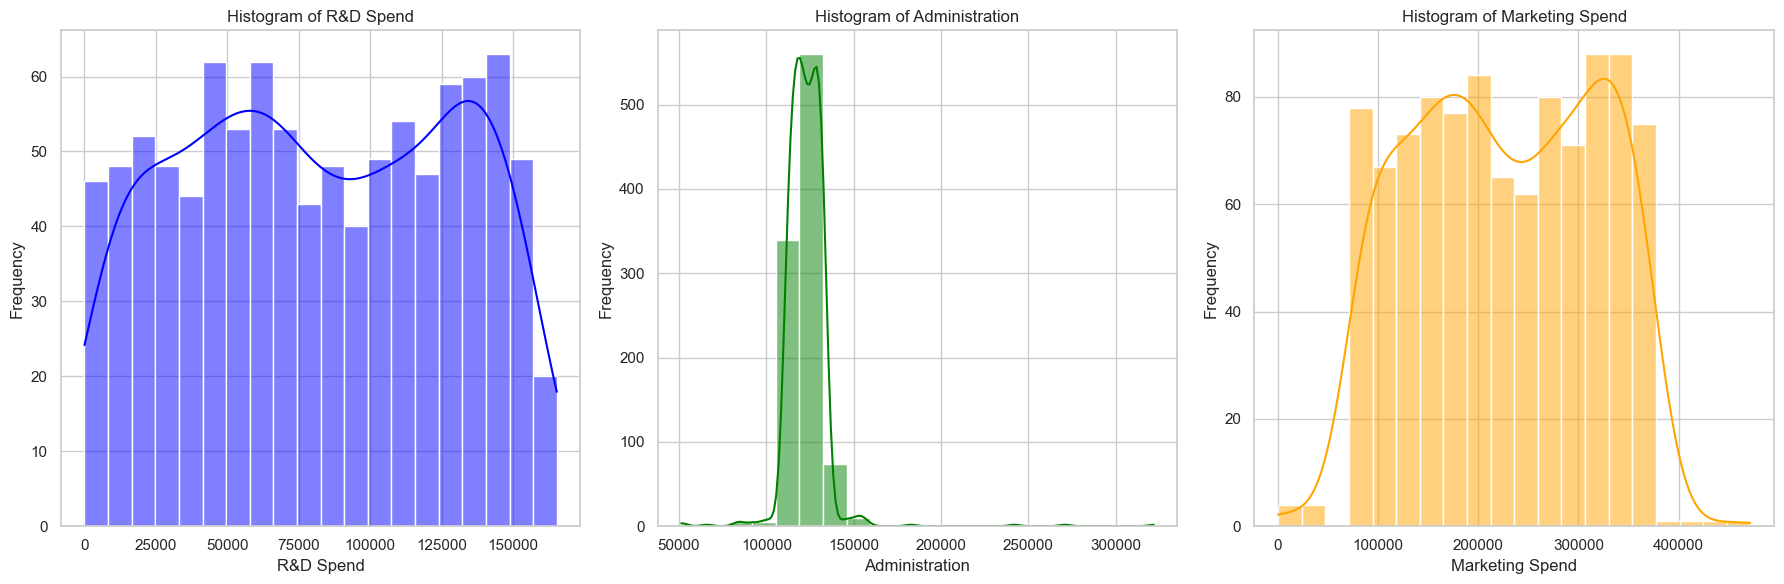

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming company is your DataFrame
# Replace 'your_data.csv' with the actual file path or URL to your dataset
# company = pd.read_csv('your_data.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for R&D Spend
sns.histplot(company['R&D Spend'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Histogram of R&D Spend")
axes[0].set_xlabel("R&D Spend")
axes[0].set_ylabel("Frequency")

# Histogram for Administration
sns.histplot(company['Administration'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Histogram of Administration")
axes[1].set_xlabel("Administration")
axes[1].set_ylabel("Frequency")

# Histogram for Marketing Spend
sns.histplot(company['Marketing Spend'], bins=20, kde=True, ax=axes[2], color='orange')
axes[2].set_title("Histogram of Marketing Spend")
axes[2].set_xlabel("Marketing Spend")
axes[2].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### Insights 

- R&D Spending has a wider spread which would cause a greater impact/contribution to the ML model training and the least influenced will be by the Administration

## Bivariate Analysis 

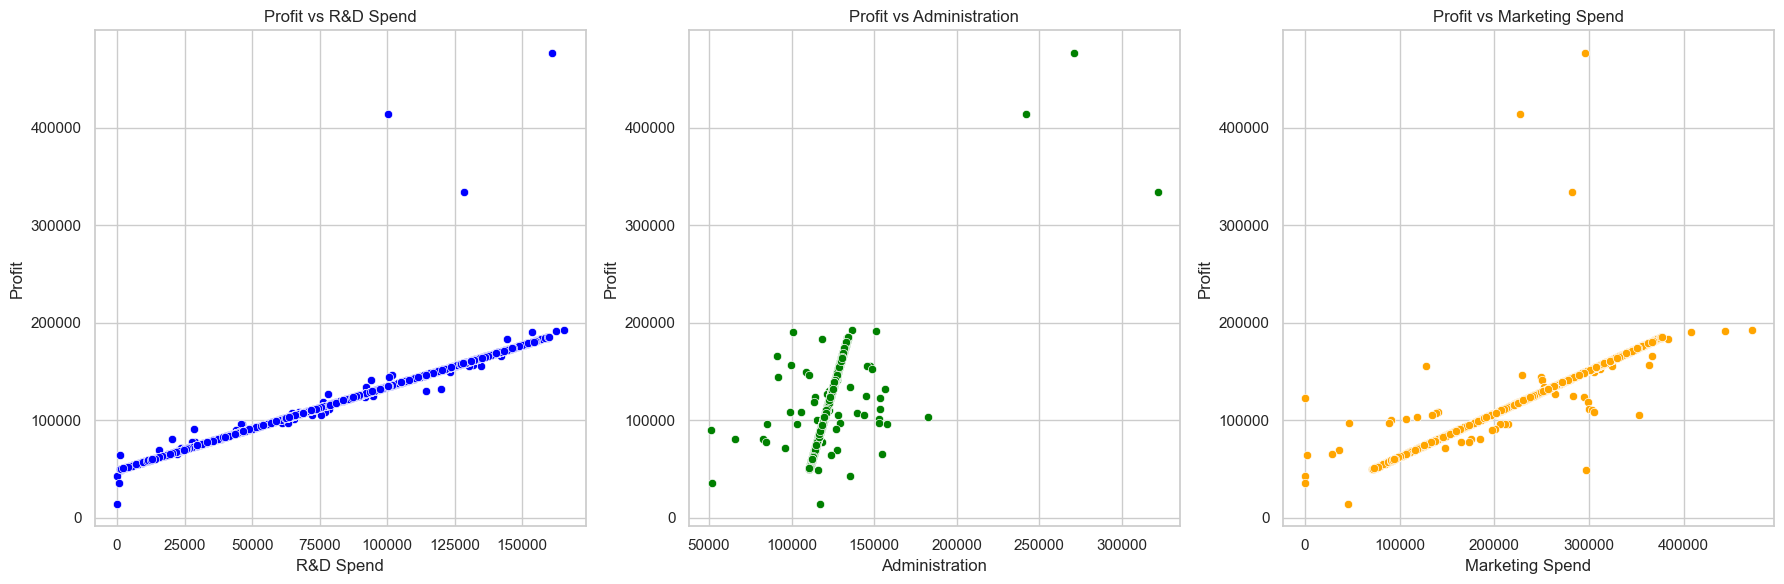

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming company is your DataFrame
# Replace 'your_data.csv' with the actual file path or URL to your dataset
# company = pd.read_csv('your_data.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot of Profit vs R&D Spend
sns.scatterplot(x="R&D Spend", y="Profit", data=company, ax=axes[0], color='blue')
axes[0].set_title("Profit vs R&D Spend")
axes[0].set_xlabel("R&D Spend")
axes[0].set_ylabel("Profit")

# Scatterplot of Profit vs Administration
sns.scatterplot(x="Administration", y="Profit", data=company, ax=axes[1], color='green')
axes[1].set_title("Profit vs Administration")
axes[1].set_xlabel("Administration")
axes[1].set_ylabel("Profit")

# Scatterplot of Profit vs Marketing Spend
sns.scatterplot(x="Marketing Spend", y="Profit", data=company, ax=axes[2], color='orange')
axes[2].set_title("Profit vs Marketing Spend")
axes[2].set_xlabel("Marketing Spend")
axes[2].set_ylabel("Profit")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Insights

The following scatterplots were done so that we can identify any outliers in data since some models like linear regression are very sensitive to ouliers and are not equipped wuth handling outliers well

- After my analysis, Ill be truncating the profit bar to 200000 since there seems to be some outliers after that point
  

### Handling outliers

|| Imputation or Removal:

- If outliers are the result of errors or data quality issues, consider imputing or removing them.
Imputation involves replacing the outlier values with more reasonable values based on the rest of the data.
Removal involves excluding the outlier values from the dataset.

* Ill be using sklearn libraries to impute the outliers when implementing the model 

|| Transformation:
Apply mathematical transformations to the data to reduce the impact of outliers.
Common transformations include taking the logarithm or square root of the values.

|| Winsorizing:

Winsorizing involves capping extreme values to a specified percentile.
For example, you might replace values beyond the 95th percentile with the value at the 95th percentile.

|| Scaling:

Use robust scaling methods that are less sensitive to outliers.
Standard scaling (subtracting the mean and dividing by the standard deviation) can be sensitive to outliers, but robust scalers like the Median Absolute Deviation (MAD) can be more resistant.

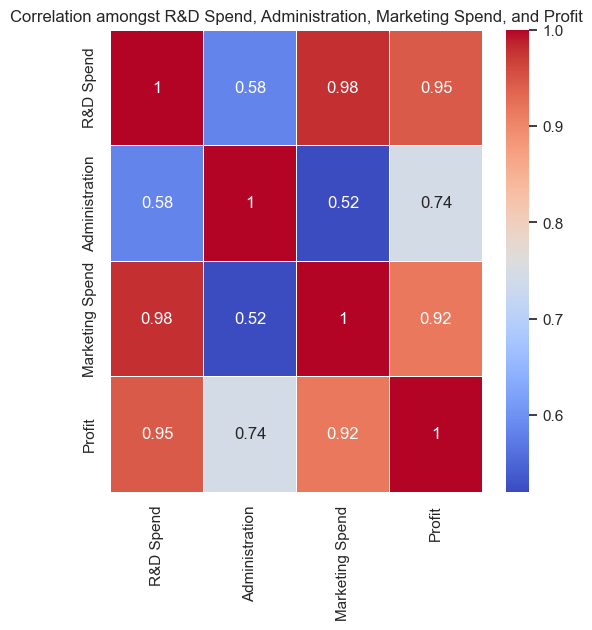

In [23]:
# Select the columns for the heatmap
heatmap_data = company[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation amongst R&D Spend, Administration, Marketing Spend, and Profit')
plt.show()

## Conclusions 

- After careful analysis from the heat map, we can derive that R&D spend is quite influential to the prediction of the profit of the company 

## Model Trainer 

## The ML model for Profit Prediction

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

#### Preparing X and Y variables

In [25]:
X = company.drop(columns=['Profit'],axis=1)

In [26]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [27]:
Y = company['Profit']

In [28]:
Y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

### Pre-processing of columns

In [31]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
o_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", o_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [34]:
X.shape

(1000, 6)

### Splitting train and test datasets 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 6), (200, 6))

In [ ]:
'''
Using cross validation set

# Split the data into training and the rest
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the remaining data into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
'''

### Create an Evaluate Function to give all metrics after model Training

In [43]:
# This common function will evaulate each models results
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    #"AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

#Iterate through each model and feed the data whilst evaluating the results for each model
'''
len(list(models)): 
This part is determining the number of models in the models dictionary. 
list(models) converts the dictionary keys into a list, and len() returns the length of that list.
So, len(list(models)) gives the number of models in the dictionary.

for i in range(len(list(models))):: 
This is a for loop that iterates over the range of the number of models. 
range(len(list(models))) generates a sequence of numbers from 0 to the number of models - 1.

model = list(models.values())[i]: 
Inside the loop, i takes on each value from the range. 
list(models.values()) gets a list of the model instances from the models dictionary (the values). 
[i] then selects the model at index i from that list. 
So, in each iteration, model is assigned the i-th model in the dictionary.
'''   
for i in range(len(list(models))):
    model = list(models.values())[i] # Each model one by one
    model.fit(X_train, y_train) # Each model getting inputted with the train and test 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10498.8263
- Mean Absolute Error: 2761.0696
- R2 Score: 0.9406
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5665.3020
- Mean Absolute Error: 1785.7123
- R2 Score: 0.9818


Lasso
Model performance for Training set
- Root Mean Squared Error: 10445.4552
- Mean Absolute Error: 2284.7381
- R2 Score: 0.9412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5545.0862
- Mean Absolute Error: 1403.0350
- R2 Score: 0.9825


Ridge
Model performance for Training set
- Root Mean Squared Error: 10445.9130
- Mean Absolute Error: 2280.1800
- R2 Score: 0.9412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5555.2476
- Mean Absolute Error: 1397.5976
- R2 Score: 0.9825


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 10681.6464
- Mean Absolute Error: 1370.4

### Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by="R2_Score", ascending=True)


,Model Name,R2_Score
3,K-Neighbors Regressor,0.970853
4,Decision Tree,0.981385
0,Linear Regression,0.981778
2,Ridge,0.982479
1,Lasso,0.982543
5,Random Forest Regressor,0.984337


### Accuracy

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.18


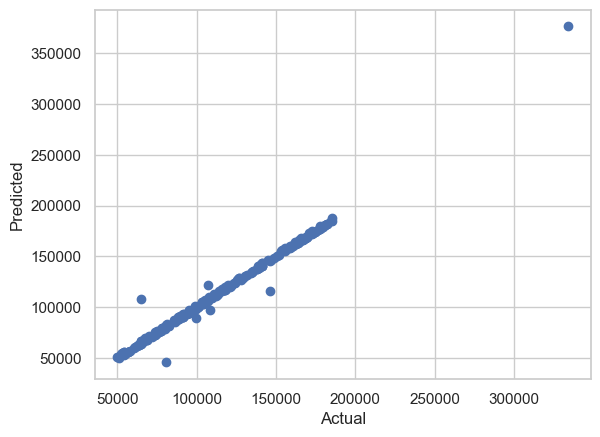

In [51]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

### Plotting y_test and y_pred values

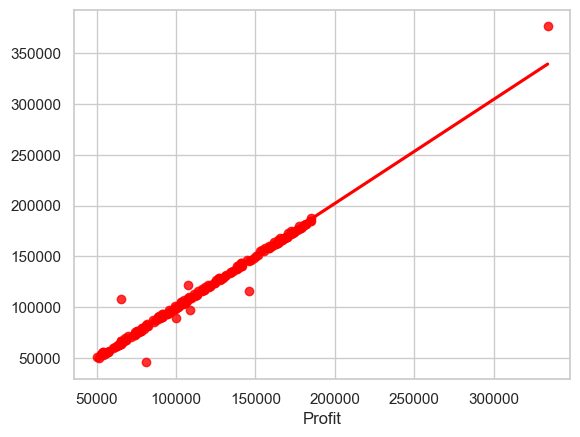

In [52]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');